In [1]:
import os
import numpy as np
import pandas as pd

dataset_path = os.path.join("/Users/bohanl/Downloads/", "annotated_queries.csv")
dataset = pd.read_csv(dataset_path, delimiter=",", header=None)
filtered_dataset = dataset.drop(dataset[dataset[20] == 0].index, axis=0, inplace=False)
filtered_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,1,0,0,0,0.0000,0.0,...,0.0,0.0,0.0,0.0000,0.9971,0.0,0.0,0.0000,10,10
1,0,0,0,1,0,0,0,0,0.0000,0.0,...,0.0,0.0,0.0,0.9649,0.0000,0.0,0.0,0.0000,2,2
2,1,0,1,0,0,0,0,0,0.8255,0.0,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,82,82
3,0,0,1,0,0,0,0,1,0.0000,0.0,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.9821,11,11
4,0,0,0,0,1,0,0,0,0.0000,0.0,...,0.0,0.0,0.0,0.0000,0.9927,0.0,0.0,0.0000,45,45


In [2]:
annotated_queries = filtered_dataset.to_numpy().astype(np.float32)

In [3]:
# prepare data

from sklearn.model_selection import train_test_split

X = annotated_queries[:,:19]  # first 19 columns (relations bit vector + columns value percentage)
y = annotated_queries[:,-2:]   # estimated and actual number of rows (cardinality)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [13]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras


model = keras.models.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=[19]),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1,  activation='relu'),
])

model.summary()
model.compile(loss="mean_squared_logarithmic_error", optimizer="Adam")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               5120      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 136,961
Trainable params: 136,961
Non-trainable params: 0
_________________________________________________________________


In [14]:
training_history = model.fit(
    X_train, y_train[:,-1],
    epochs=1000,
    validation_data=(X_val, y_val[:,-1]))

Train on 2121 samples, validate on 708 samples
Epoch 1/1000
2121/2121 [==============================] - 0s 161us/sample - loss: 40.5301 - val_loss: 19.1870
Epoch 2/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 14.9293 - val_loss: 11.8854
Epoch 3/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 10.9196 - val_loss: 9.7014
Epoch 4/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 9.4697 - val_loss: 8.5982
Epoch 5/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 8.5948 - val_loss: 7.7332
Epoch 6/1000
2121/2121 [==============================] - 0s 41us/sample - loss: 7.8504 - val_loss: 6.9229
Epoch 7/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 7.1025 - val_loss: 6.0878
Epoch 8/1000
2121/2121 [==============================] - 0s 41us/sample - loss: 6.2961 - val_loss: 5.1399
Epoch 9/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 5.3020 - v

2121/2121 [==============================] - 0s 44us/sample - loss: 0.9309 - val_loss: 1.1767
Epoch 77/1000
2121/2121 [==============================] - 0s 41us/sample - loss: 0.9424 - val_loss: 1.1762
Epoch 78/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.9199 - val_loss: 1.1808
Epoch 79/1000
2121/2121 [==============================] - 0s 45us/sample - loss: 0.9094 - val_loss: 1.1660
Epoch 80/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.9159 - val_loss: 1.1607
Epoch 81/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.8842 - val_loss: 1.1573
Epoch 82/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.8795 - val_loss: 1.1485
Epoch 83/1000
2121/2121 [==============================] - 0s 45us/sample - loss: 0.8575 - val_loss: 1.1344
Epoch 84/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.8463 - val_loss: 1.1147
Epoch 85/1000
2121/2121 [=================

2121/2121 [==============================] - 0s 42us/sample - loss: 0.5029 - val_loss: 0.8927
Epoch 152/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.4995 - val_loss: 0.8335
Epoch 153/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.4917 - val_loss: 0.8386
Epoch 154/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.5011 - val_loss: 0.8426
Epoch 155/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.4757 - val_loss: 0.8347
Epoch 156/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.4946 - val_loss: 0.8239
Epoch 157/1000
2121/2121 [==============================] - 0s 45us/sample - loss: 0.4750 - val_loss: 0.8304
Epoch 158/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.4875 - val_loss: 0.8188
Epoch 159/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.4540 - val_loss: 0.8326
Epoch 160/1000
2121/2121 [========

2121/2121 [==============================] - 0s 44us/sample - loss: 0.3312 - val_loss: 0.7438
Epoch 227/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.3185 - val_loss: 0.7602
Epoch 228/1000
2121/2121 [==============================] - 0s 45us/sample - loss: 0.3089 - val_loss: 0.7560
Epoch 229/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.3056 - val_loss: 0.7383
Epoch 230/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.3190 - val_loss: 0.7810
Epoch 231/1000
2121/2121 [==============================] - 0s 41us/sample - loss: 0.3249 - val_loss: 0.7766
Epoch 232/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.3237 - val_loss: 0.7877
Epoch 233/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.3226 - val_loss: 0.7475
Epoch 234/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.3067 - val_loss: 0.7246
Epoch 235/1000
2121/2121 [========

2121/2121 [==============================] - 0s 44us/sample - loss: 0.2084 - val_loss: 0.6834
Epoch 302/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.2291 - val_loss: 0.6678
Epoch 303/1000
2121/2121 [==============================] - 0s 41us/sample - loss: 0.2192 - val_loss: 0.6906
Epoch 304/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.2125 - val_loss: 0.6797
Epoch 305/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.2154 - val_loss: 0.6795
Epoch 306/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.2071 - val_loss: 0.7243
Epoch 307/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.2382 - val_loss: 0.6915
Epoch 308/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.2175 - val_loss: 0.6532
Epoch 309/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.2143 - val_loss: 0.6970
Epoch 310/1000
2121/2121 [========

2121/2121 [==============================] - 0s 44us/sample - loss: 0.0901 - val_loss: 0.6874
Epoch 377/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.0870 - val_loss: 0.6875
Epoch 378/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.0942 - val_loss: 0.6982
Epoch 379/1000
2121/2121 [==============================] - 0s 46us/sample - loss: 0.0837 - val_loss: 0.6982
Epoch 380/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.1555 - val_loss: 0.7906
Epoch 381/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.2054 - val_loss: 0.6989
Epoch 382/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.1331 - val_loss: 0.6813
Epoch 383/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.0912 - val_loss: 0.7021
Epoch 384/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.0998 - val_loss: 0.6773
Epoch 385/1000
2121/2121 [========

2121/2121 [==============================] - 0s 45us/sample - loss: 0.0958 - val_loss: 0.6358
Epoch 452/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.1746 - val_loss: 0.6234
Epoch 453/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.1110 - val_loss: 0.6219
Epoch 454/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0884 - val_loss: 0.6305
Epoch 455/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.1021 - val_loss: 0.6355
Epoch 456/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0827 - val_loss: 0.7010
Epoch 457/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.1142 - val_loss: 0.6564
Epoch 458/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.1142 - val_loss: 0.6324
Epoch 459/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.1337 - val_loss: 0.6727
Epoch 460/1000
2121/2121 [========

2121/2121 [==============================] - 0s 44us/sample - loss: 0.1269 - val_loss: 0.7314
Epoch 527/1000
2121/2121 [==============================] - 0s 45us/sample - loss: 0.1057 - val_loss: 0.7880
Epoch 528/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0918 - val_loss: 0.7189
Epoch 529/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0930 - val_loss: 0.6379
Epoch 530/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0818 - val_loss: 0.6071
Epoch 531/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.1080 - val_loss: 0.6187
Epoch 532/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.1039 - val_loss: 0.6334
Epoch 533/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0865 - val_loss: 0.6063
Epoch 534/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0768 - val_loss: 0.5955
Epoch 535/1000
2121/2121 [========

2121/2121 [==============================] - 0s 45us/sample - loss: 0.0799 - val_loss: 0.6092
Epoch 602/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.0704 - val_loss: 0.6482
Epoch 603/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.1109 - val_loss: 0.6706
Epoch 604/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.1036 - val_loss: 0.6187
Epoch 605/1000
2121/2121 [==============================] - 0s 45us/sample - loss: 0.0646 - val_loss: 0.6427
Epoch 606/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.0659 - val_loss: 0.6348
Epoch 607/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.0589 - val_loss: 0.6668
Epoch 608/1000
2121/2121 [==============================] - 0s 45us/sample - loss: 0.0813 - val_loss: 0.6742
Epoch 609/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0892 - val_loss: 0.7037
Epoch 610/1000
2121/2121 [========

2121/2121 [==============================] - 0s 45us/sample - loss: 0.0735 - val_loss: 0.7408
Epoch 677/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.0782 - val_loss: 0.7465
Epoch 678/1000
2121/2121 [==============================] - 0s 48us/sample - loss: 0.0637 - val_loss: 0.7121
Epoch 679/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0611 - val_loss: 0.7604
Epoch 680/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.1000 - val_loss: 0.7293
Epoch 681/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.0885 - val_loss: 0.7434
Epoch 682/1000
2121/2121 [==============================] - 0s 45us/sample - loss: 0.0648 - val_loss: 0.7293
Epoch 683/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.1366 - val_loss: 0.7151
Epoch 684/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0896 - val_loss: 0.6324
Epoch 685/1000
2121/2121 [========

2121/2121 [==============================] - 0s 44us/sample - loss: 0.0600 - val_loss: 0.6908
Epoch 752/1000
2121/2121 [==============================] - 0s 41us/sample - loss: 0.0652 - val_loss: 0.6686
Epoch 753/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.0645 - val_loss: 0.6976
Epoch 754/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0613 - val_loss: 0.6897
Epoch 755/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0564 - val_loss: 0.6800
Epoch 756/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0583 - val_loss: 0.7085
Epoch 757/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.0699 - val_loss: 0.7101
Epoch 758/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.0722 - val_loss: 0.7465
Epoch 759/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0641 - val_loss: 0.7058
Epoch 760/1000
2121/2121 [========

2121/2121 [==============================] - 0s 45us/sample - loss: 0.0574 - val_loss: 0.7298
Epoch 827/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0586 - val_loss: 0.7662
Epoch 828/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.0803 - val_loss: 0.7083
Epoch 829/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.0514 - val_loss: 0.5995
Epoch 830/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0652 - val_loss: 0.6044
Epoch 831/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0912 - val_loss: 0.5949
Epoch 832/1000
2121/2121 [==============================] - 0s 45us/sample - loss: 0.0641 - val_loss: 0.5707
Epoch 833/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.0500 - val_loss: 0.5912
Epoch 834/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0487 - val_loss: 0.6078
Epoch 835/1000
2121/2121 [========

2121/2121 [==============================] - 0s 44us/sample - loss: 0.0794 - val_loss: 0.5785
Epoch 902/1000
2121/2121 [==============================] - 0s 41us/sample - loss: 0.0764 - val_loss: 0.5735
Epoch 903/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0680 - val_loss: 0.5407
Epoch 904/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0652 - val_loss: 0.5653
Epoch 905/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.0639 - val_loss: 0.5659
Epoch 906/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.0593 - val_loss: 0.5644
Epoch 907/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0711 - val_loss: 0.5583
Epoch 908/1000
2121/2121 [==============================] - 0s 45us/sample - loss: 0.0709 - val_loss: 0.5762
Epoch 909/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0831 - val_loss: 0.5776
Epoch 910/1000
2121/2121 [========

2121/2121 [==============================] - 0s 42us/sample - loss: 0.0818 - val_loss: 0.7030
Epoch 977/1000
2121/2121 [==============================] - 0s 42us/sample - loss: 0.0863 - val_loss: 0.6703
Epoch 978/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0623 - val_loss: 0.6745
Epoch 979/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0726 - val_loss: 0.6840
Epoch 980/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.0644 - val_loss: 0.6492
Epoch 981/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0466 - val_loss: 0.6770
Epoch 982/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0529 - val_loss: 0.6418
Epoch 983/1000
2121/2121 [==============================] - 0s 44us/sample - loss: 0.0765 - val_loss: 0.6821
Epoch 984/1000
2121/2121 [==============================] - 0s 43us/sample - loss: 0.0594 - val_loss: 0.6666
Epoch 985/1000
2121/2121 [========

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error, explained_variance_score, max_error, mean_absolute_error

# Prepare data for comparison
result_frame = pd.DataFrame(columns=['Actual', 'MySQL', 'Model'])

y_pred = [i[0] for i in model.predict(X_test)]
for i in range(len(y_pred)):
    result_frame.loc[i] = [y_test[i][-1], y_test[i][-2], y_pred[i]]

# result_frame = result_frame.sort_values(by=['Actual'], inplace=False).reset_index(drop=True)

MySQL Mean Log Error:      1.1581525448362406
MySQL Mean Absolute Error: 84589.64124293785
MySQL Max Absolute Error:  3293921.0
MySQL Score:               0.521495600072519


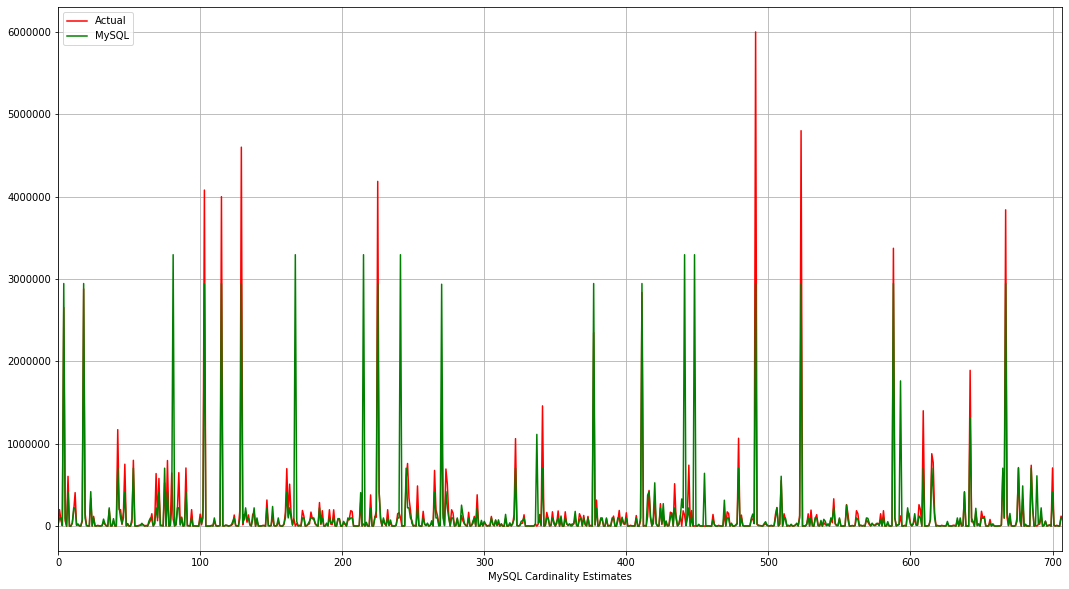

In [16]:
print('MySQL Mean Log Error:      {}'.format(mean_squared_log_error(result_frame['Actual'], result_frame['MySQL'])))
print('MySQL Mean Absolute Error: {}'.format(mean_absolute_error(result_frame['Actual'], result_frame['MySQL'])))
print('MySQL Max Absolute Error:  {}'.format(max_error(result_frame['Actual'], result_frame['MySQL'])))
print('MySQL Score:               {}'.format(explained_variance_score(result_frame['Actual'], result_frame['MySQL'])))

plt.figure(figsize=(18,10))
plt.xlabel('MySQL Cardinality Estimates')

ax1 = result_frame['Actual'].plot(color='red', grid=True, label='Actual')
ax2 = result_frame['MySQL'].plot(color='green', grid=True, label='MySQL')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

Model Mean Log Error:      0.6398367470412141
Model Mean Absolute Error: 12939.163147284149
Model Max Absolute Error:  1757615.5
Model Score:               0.9772069780352232


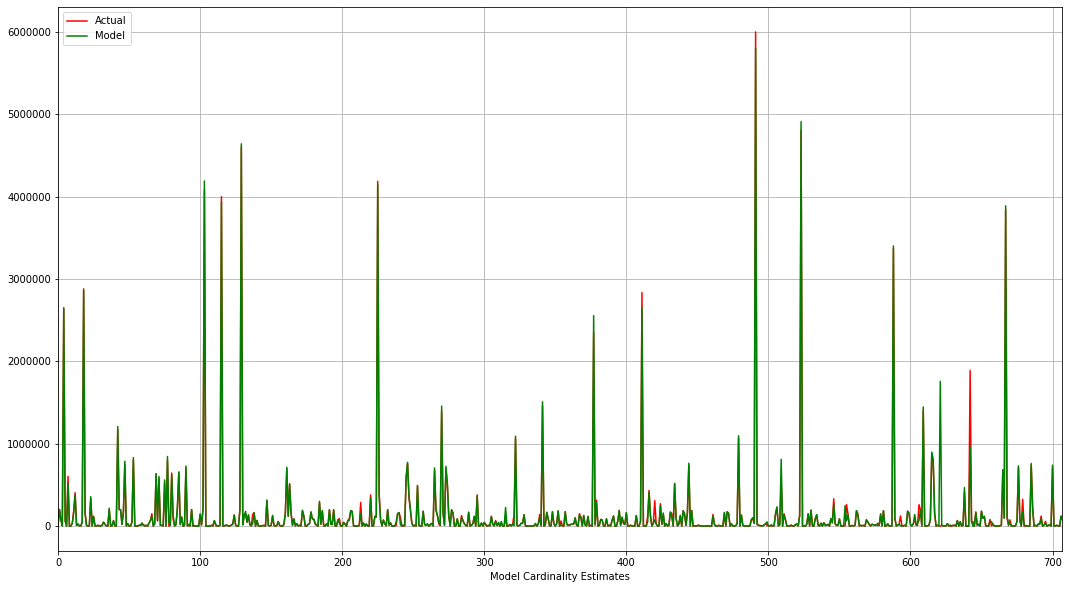

In [17]:
print('Model Mean Log Error:      {}'.format(mean_squared_log_error(result_frame['Actual'], result_frame['Model'])))
print('Model Mean Absolute Error: {}'.format(mean_absolute_error(result_frame['Actual'], result_frame['Model'])))
print('Model Max Absolute Error:  {}'.format(max_error(result_frame['Actual'], result_frame['Model'])))
print('Model Score:               {}'.format(explained_variance_score(result_frame['Actual'], result_frame['Model'])))

plt.figure(figsize=(18,10))
plt.xlabel('Model Cardinality Estimates')

ax1 = result_frame['Actual'].plot(color='red', grid=True, label='Actual')
ax2 = result_frame['Model'].plot(color='green', grid=True, label='Model')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

In [64]:
print('Done!')

Done!
